# <font color='#d50283'>IT Academy - Ciència de Dades (online)</font>
## Tasca M9 T01:   
### Exercicis d'anàlisi de sentiment i textos.
### Juan Javier Hidalgo Gómez

Tabla de contenidos, navegación por el documento:
<ul style="list-style-type:none">
<li> <a href='#--Sprint-9.-Anàlisi-de-sentiment-i-textos.'>- Sprint 9. Anàlisi de sentiment i textos. </a> </li>
<li> <a href='#--Objectius'>- Objectius.</a> </li>
<li> <a href='#--Generación-del-Entorno-de-trabajo'>- Generación del Entorno de trabajo.</a> </li>
    <ul style="list-style-type:none">
<li> <a href='#Información-del-contenido-de-los-Ficheros:'> Información del contenido de los Ficheros:</a> </li>
        <ul style="list-style-type:none">
<li> <a href='#Tamaño-y-tipos-de-Datos.'> Tamaño y tipos de Datos. </a> </li>
<li> <a href="#Visualización-de-Datos."> Visualización de Datos. </a> </li>
<li> <a href='#Fichero-de-Texto.'> Fichero de Texto. </a> </li>
<li> <a href='#Preprocesamiento-de-texto.'> Preprocesamiento de texto. </a> </li>
        </ul>
    </ul>
<li> <a href='#--Exercici-1.'>- Exercici 1. </a> </li>
<li> <a href='#--Exercici-2.'>- Exercici 2. </a> </li>
<li> <a href='#--Exercici-3.'>- Exercici 3. </a> </li>
<li> <a href='#--Conclusiones.'>- Conclusiones. </a> </li>
<li> <a href='#--Bibliografía.'>- Bibliografía. </a> </li>
</ul>

---
### <font color='#d50283'>- Sprint 9. Anàlisi de sentiment i textos.</font>   

Exercicis d'anàlisi de sentiment i textos.

---
### <font color='#d50283'>- Objectius</font>
+ **Conèixer les tècniques d\'anàlisi de sentiment i textos.**
+ **Aplicar tècniques per identificar el sentiment dels textos.**
+ **Realitzar mineria de texts.**
+ **Interpretació dels textos.**
+ **Anàlisis dels resultats.**


---
### <font color='#d50283'>- Generación del Entorno de trabajo</font>

Data Set Information:

Tenemos un DataSet, que hemos creado con la discografía de U2 y un fichero de texto dónde se explica la historia del mismo.

<font color='#00913f'>*Descripción de las variables:*</font>  

+ **Album**: Título del Album.
+ **year**: Año de la publicación del Album.
+ **song**: Título de la canción.
+ **lyrics**:  Letra de la canción.
+ **sentiment**: 1 contiene la palabra love/s, 0 no contiene.
+ **sentiment2**: Love/No Love.


In [1]:
# Imports
import requests
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from sklearn import metrics
from scipy import stats
from itertools import zip_longest
from colorama import init, Fore, Back, Style
from sklearn import set_config




# Configuration
%matplotlib inline
set_config(display='diagram')
import warnings
warnings.filterwarnings('ignore')


#Variables genéricas:
#url_data='https://raw.githubusercontent.com/Juanja67/Data-Science/main/DataSet/U2_Discografia.csv'
#Variables genéricas:
#url_data='https://github.com/Juanja67/Data-Science/blob/main/DataSet/MoviesIMDB.csv'
url_data=r'C:\Users\Nitropc\IT Academy\Data Science\DS_Sprint_09\MoviesIMDB.csv'
#Cuerpo 
data = pd.read_csv(url_data,sep=";", encoding='UTF-8',on_bad_lines='warn')
#data = pd.read_csv(path,sep=',',encoding='latin-1')
#data.columns=atributos

url_text='https://raw.githubusercontent.com/Juanja67/Data-Science/main/DataSet/U2%20are%20an%20Irish%20rock%20band%20from%20Dubl.txt'

# Descargamos el contenido del archivo
response = requests.get(url_text)
content = response.content

f = io.StringIO(content.decode("utf-8"))
texto = f.read()


### Información del contenido de los Ficheros:

#### Tamaño y tipos de Datos.

In [2]:
print(Style.BRIGHT +'Data Set Movies:'+Style.RESET_ALL)
print(' Movies Sentiment:', data.shape[0], 'filas y', data.shape[1], 'columnas.')
print(data.info())

Data Set Movies:
 Movies Sentiment: 999 filas y 2 columnas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     999 non-null    object
 1   sentiment  999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB
None


#### Visualización de Datos.

In [3]:
print(Style.BRIGHT +'Data Set Movies::'+Style.RESET_ALL)
# Primeras cinco filas
print(data.tail(5))


Data Set Movies::
                                                review sentiment
994  Others have commented on the somewhat strange ...  positive
995  When I saw this in the cinema, I remember winc...  negative
996  Having read many of the comments here, I'm sur...  negative
997  Just got around to seeing Monster Man yesterda...  positive
998  I was very moved by the story and because I am...  positive


#### Fichero de Texto.

In [4]:
print(Style.BRIGHT +'Historia de U2:'+Style.RESET_ALL)
print(texto)

Historia de U2:
U2 are an Irish rock band from Dublin, formed in 1976. The group consists of Bono (lead vocals and rhythm guitar), the Edge (lead guitar, keyboards, and backing vocals), Adam Clayton (bass guitar), and Larry Mullen Jr. (drums and percussion). Initially rooted in post-punk, U2's musical style has evolved throughout their career, yet has maintained an anthemic quality built on Bono's expressive vocals and the Edge's chiming, effects-based guitar sounds. Bono's lyrics, often embellished with spiritual imagery, focus on personal and sociopolitical themes. Popular for their live performances, the group have staged several ambitious and elaborate tours over their career.

The band was formed when the members were teenaged pupils of Mount Temple Comprehensive School and had limited musical proficiency. Within four years, they signed with Island Records and released their debut album, Boy (1980). Works such as their first UK number-one album, War (1983), and singles "Sunday Blo

#### Preprocesamiento de texto.   
El preprocesamiento de texto es un paso crucial en la realización de análisis de sentimiento, ya que ayuda a limpiar y normalizar los datos de texto, lo que facilita el análisis. El paso de preprocesamiento implica una serie de técnicas que ayudan a transformar los datos de texto sin procesar en un formulario que puede utilizar para el análisis. Algunas técnicas comunes de preprocesamiento de texto incluyen tokenización, eliminación de palabras detenidas, derivación y lematización.

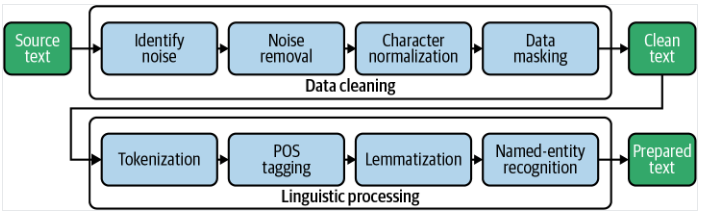

In [5]:
import string
# Remove punctuation
#texto = texto.translate(str.maketrans("", "", string.punctuation))
# Cambiamos a minusculas
texto = texto.lower()


************

### <font color='#d50283'>- Exercici 1.</font>
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

#### NLTK

La librería [Natural Languaje Toolkit](https://www.nltk.org/) es un *de facto* para NLP en Python para diversos idiomas. No solo contiene algoritmos para operaciones de NLP si no también corpus de textos y vocabulario organizado como [WordNet](https://wordnet.princeton.edu).

In [6]:
#Loading NLTK
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nitropc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Tokenize  

La tokenización es un paso de preprocesamiento de texto en el análisis de sentimientos que implica descomponer el texto en palabras individuales o tokens. Este es un paso esencial en el análisis de datos de texto, ya que ayuda a separar palabras individuales del texto sin procesar, lo que facilita su análisis y comprensión. La tokenización generalmente se realiza utilizando la función "word_tokenize" incorporada de NLTK, que puede dividir el texto en palabras individuales y signos de puntuación.


In [7]:
from nltk.tokenize import sent_tokenize
tokenized_text=sent_tokenize(texto)
print(tokenized_text)

['u2 are an irish rock band from dublin, formed in 1976. the group consists of bono (lead vocals and rhythm guitar), the edge (lead guitar, keyboards, and backing vocals), adam clayton (bass guitar), and larry mullen jr. (drums and percussion).', "initially rooted in post-punk, u2's musical style has evolved throughout their career, yet has maintained an anthemic quality built on bono's expressive vocals and the edge's chiming, effects-based guitar sounds.", "bono's lyrics, often embellished with spiritual imagery, focus on personal and sociopolitical themes.", 'popular for their live performances, the group have staged several ambitious and elaborate tours over their career.', 'the band was formed when the members were teenaged pupils of mount temple comprehensive school and had limited musical proficiency.', 'within four years, they signed with island records and released their debut album, boy (1980).', 'works such as their first uk number-one album, war (1983), and singles "sunday 

In [8]:
#Identifico los tokens:

from nltk.tokenize import word_tokenize

tokens_word=word_tokenize(texto)

print(tokens_word)

['u2', 'are', 'an', 'irish', 'rock', 'band', 'from', 'dublin', ',', 'formed', 'in', '1976.', 'the', 'group', 'consists', 'of', 'bono', '(', 'lead', 'vocals', 'and', 'rhythm', 'guitar', ')', ',', 'the', 'edge', '(', 'lead', 'guitar', ',', 'keyboards', ',', 'and', 'backing', 'vocals', ')', ',', 'adam', 'clayton', '(', 'bass', 'guitar', ')', ',', 'and', 'larry', 'mullen', 'jr.', '(', 'drums', 'and', 'percussion', ')', '.', 'initially', 'rooted', 'in', 'post-punk', ',', 'u2', "'s", 'musical', 'style', 'has', 'evolved', 'throughout', 'their', 'career', ',', 'yet', 'has', 'maintained', 'an', 'anthemic', 'quality', 'built', 'on', 'bono', "'s", 'expressive', 'vocals', 'and', 'the', 'edge', "'s", 'chiming', ',', 'effects-based', 'guitar', 'sounds', '.', 'bono', "'s", 'lyrics', ',', 'often', 'embellished', 'with', 'spiritual', 'imagery', ',', 'focus', 'on', 'personal', 'and', 'sociopolitical', 'themes', '.', 'popular', 'for', 'their', 'live', 'performances', ',', 'the', 'group', 'have', 'staged'

In [9]:
# Analizo la frecuencia con la que salen los tokens

from nltk.probability import FreqDist
frecuencia = FreqDist(tokens_word)
print(frecuencia)

<FreqDist with 354 samples and 731 outcomes>


In [10]:
# Los Tokens más comunes.

frecuencia.most_common(15)

[(',', 61),
 ('and', 34),
 ('the', 28),
 ('their', 22),
 ('.', 20),
 ('(', 19),
 (')', 19),
 ('of', 16),
 ('u2', 10),
 ('in', 10),
 ('album', 10),
 ('with', 8),
 ('for', 7),
 ('a', 7),
 ('band', 6)]

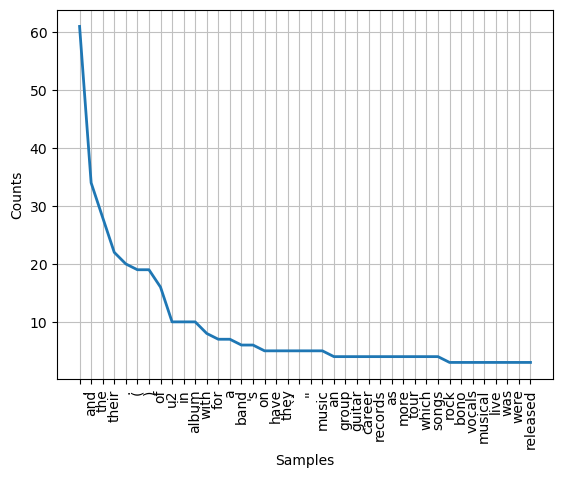

In [11]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
frecuencia.plot(40,cumulative=False)
plt.show()

Observamos que las frecuencias donde obtenemos mayores valores signos, articulos y conjunciones, que no aprotan mucha información en un principio.

************

### <font color='#d50283'>- Exercici 2.</font>
Treu les stopwords i realitza stemming al teu conjunt de dades.

#### Texto.

#### StopWords.
La eliminación de palabras detenidas es un paso crucial de preprocesamiento de texto en el análisis de sentimientos que implica eliminar palabras comunes e irrelevantes que es poco probable que transmitan mucho sentimiento. Las palabras de parada son palabras que son muy comunes en un idioma y no tienen mucho significado, como "y", "el", "de" y "eso". Estas palabras pueden causar ruido y sesgar el análisis si no se eliminan.     
Al eliminar las palabras vacías, es más probable que las palabras restantes en el texto indiquen el sentimiento que se expresa. Esto puede ayudar a mejorar la precisión del análisis de sentimiento. NLTK proporciona una lista integrada de palabras de parada para varios idiomas, que se pueden utilizar para filtrar estas palabras de los datos de texto.


In [12]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nitropc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nitropc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nitropc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nitropc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
# buscamos las stopwords:

from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))
print(stop_words)
print('Total de stopwords encontradas: ', len(stop_words))

{'down', "aren't", 'doesn', 'now', 'in', 've', "haven't", "it's", 'because', 'after', 'few', 'with', 'off', 'been', 'all', 'him', 'if', 'that', 'shouldn', 'did', 'when', 'here', 'has', 'such', "didn't", 'won', 's', 'they', 'weren', 'over', 'a', 'own', 'but', "don't", "doesn't", 'ourselves', 'just', 'more', 'wasn', 'll', 'my', 'each', 'his', 'its', 'haven', 'both', "shan't", 'wouldn', 'will', 'before', 're', 'any', "hadn't", 'than', 'these', 'and', 'whom', 'can', 'until', "wouldn't", 'for', 'herself', 'm', 'out', 'hadn', 'so', 'them', 'from', 'theirs', 'how', 'what', 'shan', 'don', 'ain', 'ma', 'during', 'didn', 'where', 'into', 't', 'are', 'up', 'mustn', 'hers', 'were', 'being', 'of', 'some', "isn't", "hasn't", 'themselves', 'itself', 'why', 'nor', 'is', "that'll", 'those', 'while', 'or', "mightn't", 'their', 'below', 'needn', 'was', 'you', 'about', 'should', 'me', "you've", 'yourselves', 'other', 'who', "won't", "you're", 'your', 'having', 'between', "weren't", 'not', 'above', 'as', '

In [14]:
# Remove stop words
filter_tokens=[]
filter_tokens = [token for token in tokens_word[:250] if token not in stopwords.words('english')]


In [15]:
 
print(f"- Frases Tokenized: Total de palabras, {len(tokens_word[:250])}\n",tokens_word[:250])
print(f"\n- Tolkens filtrados: Total de palabras, {len(filter_tokens)}\n ",filter_tokens)
print(f"\nTotal de palabras extraidas, {len(tokens_word[:250])-len(filter_tokens)}")

- Frases Tokenized: Total de palabras, 250
 ['u2', 'are', 'an', 'irish', 'rock', 'band', 'from', 'dublin', ',', 'formed', 'in', '1976.', 'the', 'group', 'consists', 'of', 'bono', '(', 'lead', 'vocals', 'and', 'rhythm', 'guitar', ')', ',', 'the', 'edge', '(', 'lead', 'guitar', ',', 'keyboards', ',', 'and', 'backing', 'vocals', ')', ',', 'adam', 'clayton', '(', 'bass', 'guitar', ')', ',', 'and', 'larry', 'mullen', 'jr.', '(', 'drums', 'and', 'percussion', ')', '.', 'initially', 'rooted', 'in', 'post-punk', ',', 'u2', "'s", 'musical', 'style', 'has', 'evolved', 'throughout', 'their', 'career', ',', 'yet', 'has', 'maintained', 'an', 'anthemic', 'quality', 'built', 'on', 'bono', "'s", 'expressive', 'vocals', 'and', 'the', 'edge', "'s", 'chiming', ',', 'effects-based', 'guitar', 'sounds', '.', 'bono', "'s", 'lyrics', ',', 'often', 'embellished', 'with', 'spiritual', 'imagery', ',', 'focus', 'on', 'personal', 'and', 'sociopolitical', 'themes', '.', 'popular', 'for', 'their', 'live', 'performa

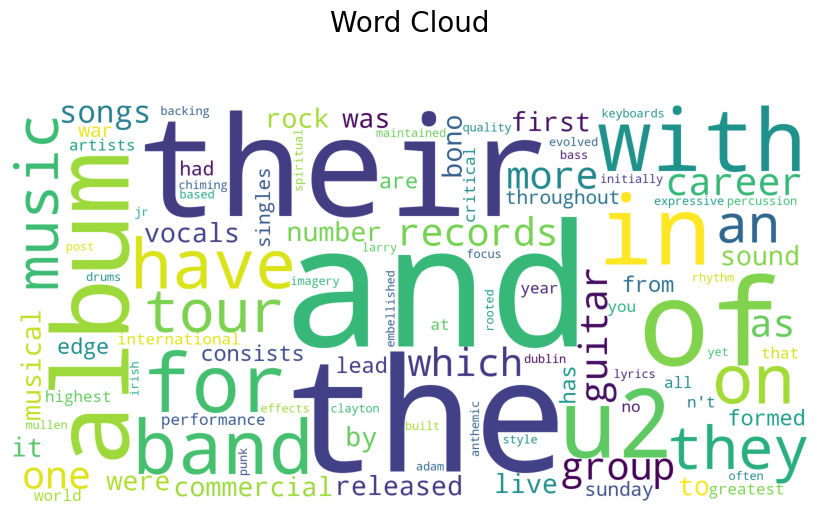

In [16]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
#display(stop_words)
comment_words = ''
# iterate through the csv file
text = " ".join(review for review in tokens_word)
#print(text)
for val in list(text):
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud( width = 1600, height = 800,
                background_color ='white',
                stopwords=text, max_words=100,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud\n\n', fontsize=20)
plt.show()


#### Stemming y Lematización.   

Stemming y lematización son técnicas utilizadas para reducir las palabras a sus formas raíz. Stemming implica eliminar los sufijos de palabras, como "ing" o "ed", para reducirlos a su forma base. Por ejemplo, la palabra "formed" se derivaría a "form".   
La lematización, sin embargo, implica reducir las palabras a su forma base en función de su parte del habla. Por ejemplo, la palabra "rising" se lematizaría a "rise".

In [17]:
# Instanciamos SnowballStemmer() de NLTK en español
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

In [18]:
stemmer_text=[stemmer.stem(i) for i in filter_tokens]



In [19]:
print("- Filtered Sentence:\n",filter_tokens)
print("\n- Stemmed Sentence:\n",stemmer_text)

- Filtered Sentence:
 ['u2', 'irish', 'rock', 'band', 'dublin', ',', 'formed', '1976.', 'group', 'consists', 'bono', '(', 'lead', 'vocals', 'rhythm', 'guitar', ')', ',', 'edge', '(', 'lead', 'guitar', ',', 'keyboards', ',', 'backing', 'vocals', ')', ',', 'adam', 'clayton', '(', 'bass', 'guitar', ')', ',', 'larry', 'mullen', 'jr.', '(', 'drums', 'percussion', ')', '.', 'initially', 'rooted', 'post-punk', ',', 'u2', "'s", 'musical', 'style', 'evolved', 'throughout', 'career', ',', 'yet', 'maintained', 'anthemic', 'quality', 'built', 'bono', "'s", 'expressive', 'vocals', 'edge', "'s", 'chiming', ',', 'effects-based', 'guitar', 'sounds', '.', 'bono', "'s", 'lyrics', ',', 'often', 'embellished', 'spiritual', 'imagery', ',', 'focus', 'personal', 'sociopolitical', 'themes', '.', 'popular', 'live', 'performances', ',', 'group', 'staged', 'several', 'ambitious', 'elaborate', 'tours', 'career', '.', 'band', 'formed', 'members', 'teenaged', 'pupils', 'mount', 'temple', 'comprehensive', 'school', 

In [20]:
#Lexicon Normalization

#Nos vamos a  aquedar con la parte de la palabra que realmente aporta información

from nltk.stem.wordnet import WordNetLemmatizer
wnl = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


print('\n Ejemplo de lematización:\n')
words=filter_tokens[:70]
#Presentar en parrafo
#lem_text=[wnl.lemmatize(i,"v") for i in words]
#stem_text=[ps.stem(i) for i in words]
#print("Original Word:\n",words)
#print("Lemmatized Word:\n",lem_text)
#print("\nStemmed Word:\n",stem_text)
#Presentar en columna
print("{0:20}{1:20}{2:20}".format("--Word--","--Lemma--","--Stem--"))
for word in words:
   print ("{0:20}{1:20}{2:20}".format(word, ps.stem(word),wnl.lemmatize(word, pos="v")))


 Ejemplo de lematización:

--Word--            --Lemma--           --Stem--            
u2                  u2                  u2                  
irish               irish               irish               
rock                rock                rock                
band                band                band                
dublin              dublin              dublin              
,                   ,                   ,                   
formed              form                form                
1976.               1976.               1976.               
group               group               group               
consists            consist             consist             
bono                bono                bono                
(                   (                   (                   
lead                lead                lead                
vocals              vocal               vocals              
rhythm              rhythm              rhythm           

#### Conjunto de Datos.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     999 non-null    object
 1   sentiment  999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [23]:
data = data[data['review'].notna()]

In [24]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [25]:
# Cojo una sola canción:

data.iloc[0][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [26]:
# En este fichero la parte importante es la columna sentimiento.
# Voy a ver que cantidad de puntuacion hay para cada valor.

data.sentiment.value_counts()

negative    500
positive    499
Name: sentiment, dtype: int64

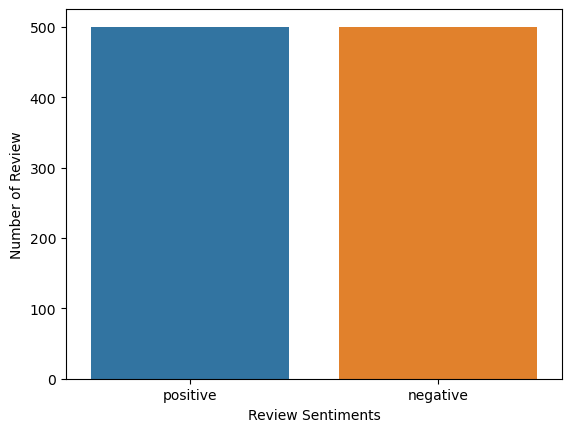

In [27]:
sns.countplot(x=data["sentiment"])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [28]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function df

data['review'] =data['review'].apply(preprocess_text)
data

,review,sentiment
0,one reviewer mentioned watching 1 oz episode '...,positive
1,wonderful little production . < br / > < br / ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically 's family little boy ( jake ) think ...,negative
4,petter mattei 's `` love time money '' visuall...,positive
...,...,...
994,others commented somewhat strange video arrang...,positive
995,"saw cinema , remember wincing bad acting minut...",negative
996,"read many comment , 'm surprised one recognize...",negative
997,got around seeing monster man yesterday . long...,positive


In [29]:
# Creamos un modelo y para ello vamos a separar las frases de test y de Train

# separamos train y test
train, test = train_test_split(data, test_size=0.33, random_state=1)
# Separamos en X e y
train_y = train.iloc[:,1]
train_X = train.iloc[:,0]
test_y = test.iloc[:,1]
test_X = test.iloc[:,0]

In [30]:
train_X

481    boring film ! sum , basically nana patekar bea...
967    hilarious movie . one best thing quality perfo...
770    managed see new york international film festiv...
294    find critique many imdb user little harsh many...
618    greta garbo 's first talking picture , mgm wis...
                             ...                        
767    big-time prince fan last three four year , rea...
72     probably worst movie ever seen life ! ! stupid...
908    review main page admits movie horrible forgive...
235    lost , `` 24 '' , `` carnivale '' , `` despera...
37     heard good thing `` state grace '' came open m...
Name: review, Length: 669, dtype: object

#### TF-IDF

In [31]:

# Vectorizamos los textos por TF-IDF
vec = TfidfVectorizer(min_df=2)
model = MultinomialNB()
clf = make_pipeline(vec,model)

clf = clf.fit(train_X, train_y)


predictions = clf.predict(test_X)

In [32]:
#sum(predictions ==  test_y) / len(test_y)
print("MultinomialNB Accuracy: ",round(metrics.accuracy_score(test_y, predictions),2))

MultinomialNB Accuracy:  0.78


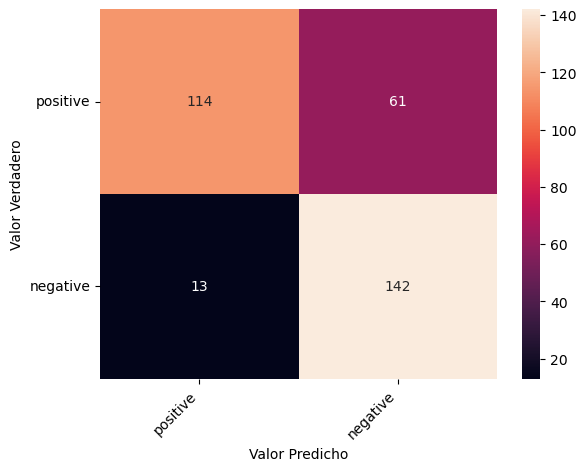

In [33]:
df_cm = confusion_matrix(test_y,predictions,labels=test_y.unique())
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(test_y.unique(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(test_y.unique(), rotation=45, ha='right')
plt.ylabel('Valor Verdadero')
plt.xlabel('Valor Predicho');

In [34]:

to_predict = "I don´t like the movie."
print('Texto a probar:\n',to_predict)
print('\nResultado: ',clf.predict([to_predict])[0])


to_predict2 = "A wonderful little production and movie."
print('Texto a probar:\n',to_predict2)
print('\nResultado: ',clf.predict([to_predict2])[0])



Texto a probar:
 I don´t like the movie.

Resultado:  negative
Texto a probar:
 A wonderful little production and movie.

Resultado:  positive


#### Part-Of-Speech Tags.   
Podemos estimar la función gramatical de cada palabra, accediendo directamente al atributo .pos_ de cada token:

In [35]:
tokens = nltk.word_tokenize(to_predict)
tokens
tagged = nltk.pos_tag(tokens)
tagged[0:6]

[('I', 'PRP'),
 ('don´t', 'VBP'),
 ('like', 'IN'),
 ('the', 'DT'),
 ('movie', 'NN'),
 ('.', '.')]

In [36]:
tokens = nltk.word_tokenize(to_predict2)
tokens
tagged = nltk.pos_tag(tokens)
tagged[0:6]

[('A', 'DT'),
 ('wonderful', 'JJ'),
 ('little', 'JJ'),
 ('production', 'NN'),
 ('and', 'CC'),
 ('movie', 'NN')]

#### CountVectorizer

In [37]:
# Ahora vamos a vectorizar las palabras

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['review'])

In [38]:
print(text_counts)

  (0, 11373)	1
  (0, 8589)	1
  (0, 14756)	2
  (0, 7)	1
  (0, 9693)	6
  (0, 4629)	2
  (0, 8030)	3
  (0, 6503)	1
  (0, 11437)	2
  (0, 4767)	1
  (0, 6123)	1
  (0, 1769)	6
  (0, 13650)	1
  (0, 13100)	2
  (0, 1907)	1
  (0, 14239)	1
  (0, 11834)	1
  (0, 14585)	4
  (0, 12084)	1
  (0, 15013)	2
  (0, 14026)	1
  (0, 4951)	1
  (0, 6263)	1
  (0, 13749)	1
  (0, 10666)	1
  :	:
  (998, 4476)	1
  (998, 12042)	1
  (998, 5145)	1
  (998, 4948)	1
  (998, 7391)	1
  (998, 1652)	1
  (998, 849)	1
  (998, 9629)	1
  (998, 1351)	1
  (998, 8957)	1
  (998, 9825)	1
  (998, 4322)	1
  (998, 12261)	1
  (998, 2487)	1
  (998, 4133)	1
  (998, 14536)	1
  (998, 6502)	1
  (998, 2676)	1
  (998, 4426)	1
  (998, 1981)	1
  (998, 6524)	1
  (998, 6206)	1
  (998, 6600)	1
  (998, 12771)	1
  (998, 1655)	1


In [39]:
# Creamos un modelo y para ello vamos a separar las frases de test y de Train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['sentiment'], test_size=0.3, random_state=1)

In [40]:

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)


print("MultinomialNB Accuracy: ",round(metrics.accuracy_score(y_test, predicted),2))

MultinomialNB Accuracy:  0.8


Aunque hemos utilizado dos técnicas diferentes el Accuracy en este caso es muy parecido.

************

### <font color='#d50283'>- Exercici 3.</font>
Realitza sentiment analysis al teu conjunt de dades.

#### SentimentIntensityAnalyzer.   
La función polarity_scores() de SentimentIntensityAnalyzer toma una cadena de texto como entrada y devuelve un diccionario con cuatro valores: neg, neu, pos y compound. Estos valores representan la negatividad, neutralidad, positividad y una puntuación compuesta del sentimiento en el texto, respectivamente. Los valores oscilan entre -1 y 1, donde los valores más cercanos a -1 indican sentimientos negativos y los valores más cercanos a 1 indican sentimientos positivos.

SentimentIntensityAnalyzer utiliza un enfoque basado en reglas para analizar el sentimiento en el texto, lo que significa que no requiere de datos de entrenamiento y se puede utilizar directamente en cualquier texto en inglés.

In [41]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nitropc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nitropc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Texto Bibliografía U2.

In [42]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Crear un objeto SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Calcular la polaridad del sentimiento en un texto
#texto = "Este es un texto de ejemplo para analizar el sentimiento."
polaridad = sid.polarity_scores(texto)

# Mostrar el resultado
print(polaridad)
valores = pd.DataFrame([[key, polaridad[key]] for key in polaridad.keys()], columns=['Tipo', 'Valor'])
valores


{'neg': 0.047, 'neu': 0.872, 'pos': 0.081, 'compound': 0.965}


,Tipo,Valor
0,neg,0.047
1,neu,0.872
2,pos,0.081
3,compound,0.965


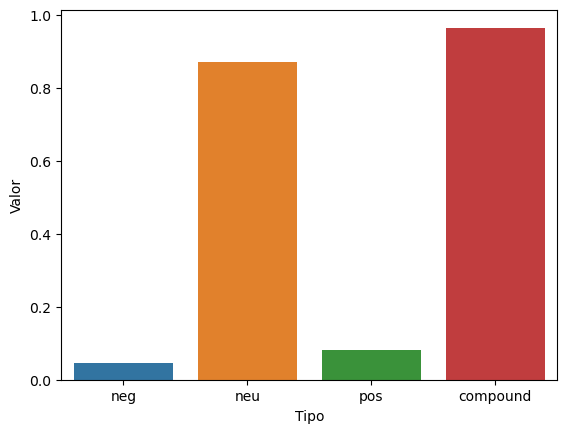

In [43]:
sns.barplot(data=valores, x="Tipo", y="Valor")
plt.show()

#### DataSet Movies.

In [44]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()
# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 'positive' if scores['pos'] > scores['neg'] else 'negative'
    #positivo=scores['pos']
    #negativo=scores['neg']
    return sentiment#,positivo,negativo

# apply get_sentiment function

data['sentiment_SIA'] = data['review'].apply(get_sentiment)

data

,review,sentiment,sentiment_SIA
0,one reviewer mentioned watching 1 oz episode '...,positive,negative
1,wonderful little production . < br / > < br / ...,positive,positive
2,thought wonderful way spend time hot summer we...,positive,positive
3,basically 's family little boy ( jake ) think ...,negative,negative
4,petter mattei 's `` love time money '' visuall...,positive,positive
...,...,...,...
994,others commented somewhat strange video arrang...,positive,positive
995,"saw cinema , remember wincing bad acting minut...",negative,negative
996,"read many comment , 'm surprised one recognize...",negative,positive
997,got around seeing monster man yesterday . long...,positive,positive


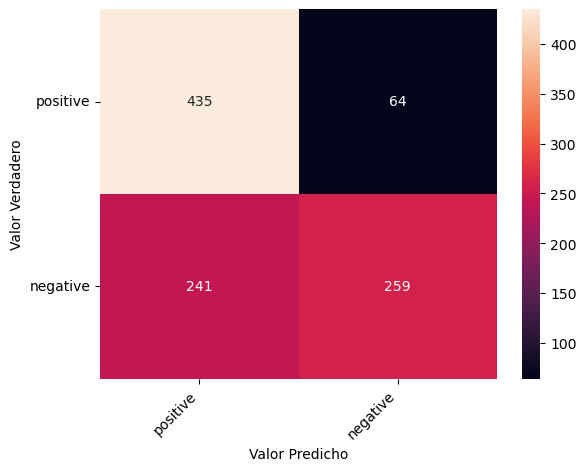

In [45]:
df_cm = confusion_matrix(data['sentiment'],data['sentiment_SIA'],labels=test_y.unique())
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(test_y.unique(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(test_y.unique(), rotation=45, ha='right')
plt.ylabel('Valor Verdadero')
plt.xlabel('Valor Predicho');

In [46]:
from sklearn.metrics import classification_report

print(classification_report(data['sentiment'],data['sentiment_SIA']))

              precision    recall  f1-score   support

    negative       0.80      0.52      0.63       500
    positive       0.64      0.87      0.74       499

    accuracy                           0.69       999
   macro avg       0.72      0.69      0.68       999
weighted avg       0.72      0.69      0.68       999



************

### - Conclusiones.


    
    

NLTK es una biblioteca potente y flexible para realizar análisis de sentimiento y otras tareas de procesamiento de lenguaje natural en Python. Al usar NLTK, podemos preprocesar datos de texto, convertirlos en un modelo de bolsa de palabras y realizar análisis de sentimiento utilizando el analizador de sentimiento de Vader.

************

### <font color='#d50283'>- Bibliografía.</font>

- <font color='##08a22a'></font>[*Información del Sprint 09.*](<https://itacademy.barcelonactiva.cat/course/view.php?id=89&section=12>)
- <font color='##08a22a'></font>[*Introdución al Procesamiento de Lenguaje Natural (NLP).*](<https://www.youtube.com/watch?v=Ro3zbJ53G-U&list=PLISuMnTdVU-zqHzRXyLO5_rNhUIIyDxFV>)
- <font color='##08a22a'></font>[*Stemming and Lemmatization in Python.*](<https://www.datacamp.com/tutorial/stemming-lemmatization-python>)
- <font color='##08a22a'></font>[*Diferencias de countvectorizer o tfidfvectorizer.*](<https://medium.com/@sergiodana/tfidvectorizer-versus-countvectorizer-diferencias-10202f0e4fe0>)
- <font color='##08a22a'></font> [*Bibliografía U2* ](<https://en.wikipedia.org/wiki/U2>)    
- <font color='##08a22a'></font> [*Discografía U2* ](<https://www.azlyrics.com/u/u2band.html>)  

---

In [47]:

!pip install session_info
import session_info


session_info.show()

Defaulting to user installation because normal site-packages is not writeable


In [48]:
!pip freeze > requirements.txt